<a href="https://colab.research.google.com/github/PolavinaDaria/machine_learning/blob/main/%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH_TO_FILE: str = 'Coffe_sales.csv'
df = pd.read_csv(PATH_TO_FILE)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [5]:
# преобразовать категориальные признаки в category
df['coffee_name'] = df.coffee_name.astype('category')
df['Time_of_Day'] = df.Time_of_Day.astype('category')
df['Weekday'] = df.Weekday.astype('category')
df['Month_name'] = df.Month_name.astype('category')
df['Weekdaysort'] = df.Weekdaysort.astype('category')
df['Monthsort'] = df.Monthsort.astype('category')
df['cash_type'] = df.cash_type.astype('category')
df['Date'] = df.Date.astype('category')
df['Time'] = df.Time.astype('category')

In [6]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df.money
X = df.drop('money', axis=1)

In [7]:
X.head(n=5) # проверка отсутствия money

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

## Y и категориальные

In [8]:
# Прверка на пропуски данных
print("Пропуски в данных:")
print(df.isnull().sum())
print(f"\nВсего строк: {len(df)}")

Пропуски в данных:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

Всего строк: 3547


Пропусков нет, но если бы пропуски были:

План действий:

Меньше 5% пропусков → удаление строк

5-20% пропусков → заполнение медианой/модой

Больше 20% пропусков → создание бинарного признака "пропуск"

In [9]:
df.head(n=3)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000


In [10]:
# определяем целевую переменную
y_eda = df["money"]

# признаки (берем все данные, но убираем колонку money)
X_eda = df.drop(columns=["money"])

print("Целевая переменная (money):")
print(f"Минимум: {y_eda.min()}, Максимум: {y_eda.max()}, Среднее: {y_eda.mean():.2f}")

Целевая переменная (money):
Минимум: 18.12, Максимум: 38.7, Среднее: 31.65


In [11]:
X_eda.describe(include='all')

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
count,3547.000000,3547,3547,3547,3547,3547,3547.0,3547.0,3547,3547
unique,NaN,1,8,3,7,12,7.0,12.0,381,3547
top,NaN,card,Americano with Milk,Afternoon,Tue,Mar,2.0,3.0,2024-10-11,22:59:18.544000
freq,NaN,3547,809,1205,572,494,572.0,494.0,26,1
mean,14.185791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.234010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


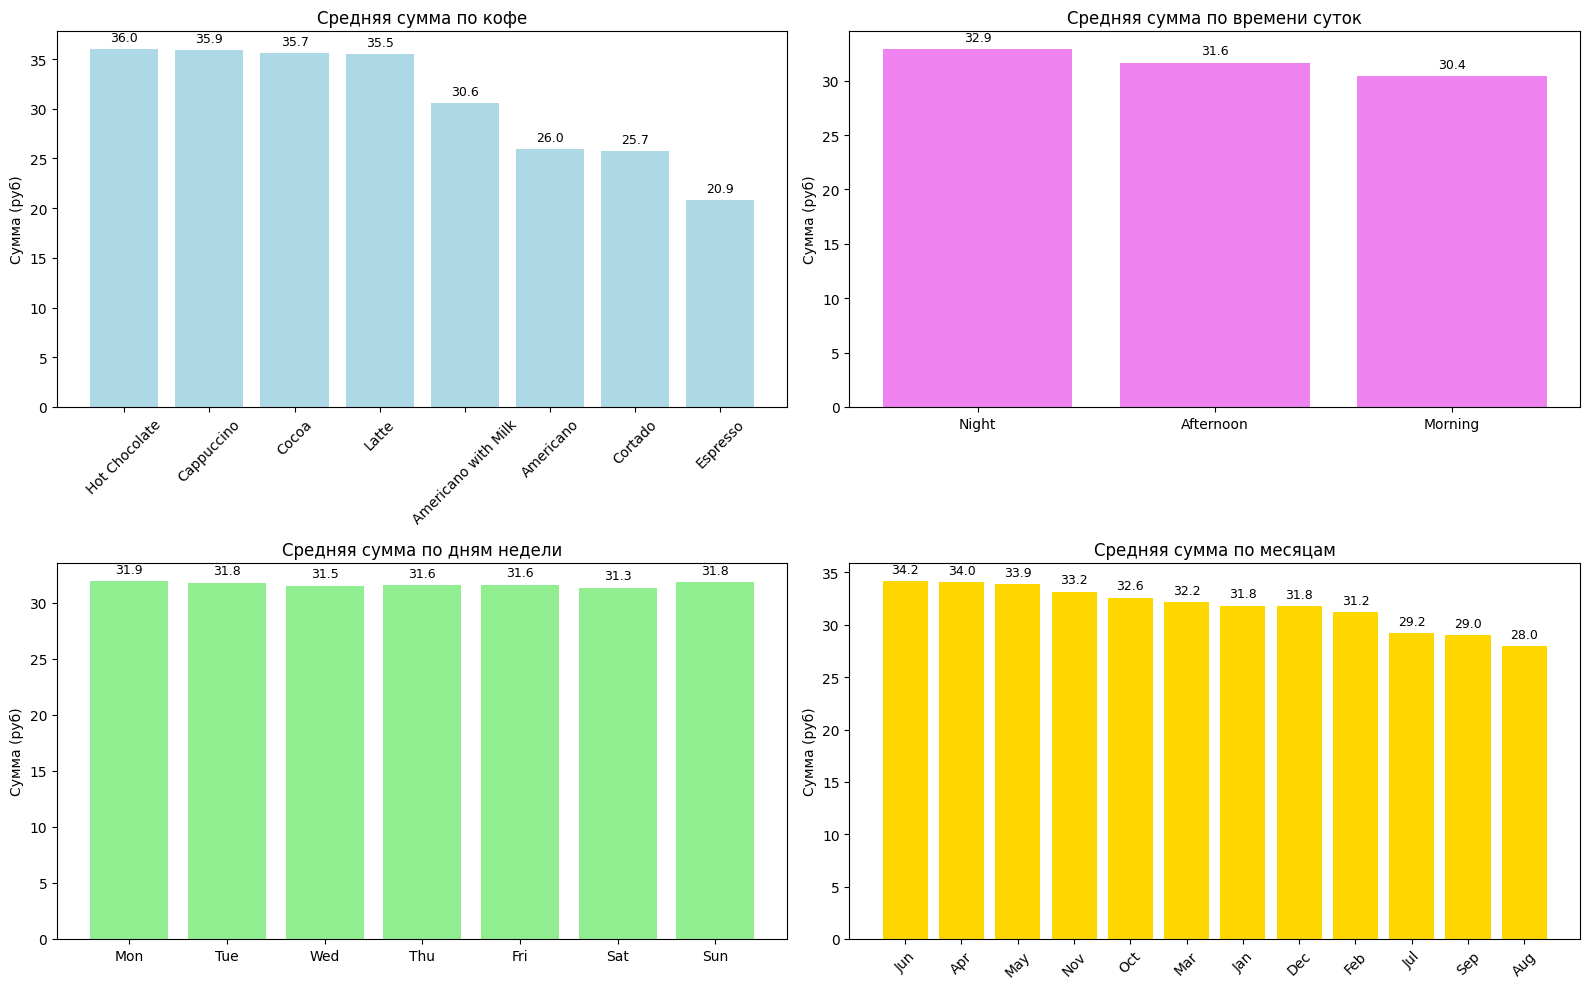

СВОДКА СРЕДНИХ СУММ
            КОФЕ             |         ВРЕМЯ          |         ДНИ          |          МЕСЯЦЫ          
----------------------------------------------------------------------------------------------------
Hot Chocolate    36.0        | Night         32.9     | Mon       31.9       | Jun         34.2         
Cappuccino       35.9        | Afternoon     31.6     | Tue       31.8       | Apr         34.0         
Cocoa            35.7        | Morning       30.4     | Wed       31.5       | May         33.9         
Latte            35.5        |                        | Thu       31.6       | Nov         33.2         
Americano with Milk  30.6    |                        | Fri       31.6       | Oct         32.6         
Americano        26.0        |                        | Sat       31.3       | Mar         32.2         
Cortado          25.7        |                        | Sun       31.8       | Jan         31.8         
Espresso         20.9        |         

In [12]:
plt.figure(figsize=(16, 10))

# 1. Кофе
plt.subplot(2, 2, 1)
coffee_avg = df.groupby('coffee_name')['money'].mean().sort_values(ascending=False)
plt.bar(range(len(coffee_avg)), coffee_avg.values, color='lightblue')
plt.xticks(range(len(coffee_avg)), coffee_avg.index, rotation=45)
plt.title('Средняя сумма по кофе')
plt.ylabel('Сумма (руб)')
# Добавляем значения на столбцы
for i, v in enumerate(coffee_avg.values):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

# 2. Время суток
plt.subplot(2, 2, 2)
time_avg = df.groupby('Time_of_Day')['money'].mean().sort_values(ascending=False)
plt.bar(range(len(time_avg)), time_avg.values, color='violet')
plt.xticks(range(len(time_avg)), time_avg.index)
plt.title('Средняя сумма по времени суток')
plt.ylabel('Сумма (руб)')
# Добавляем значения на столбцы
for i, v in enumerate(time_avg.values):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

# 3. Дни недели
plt.subplot(2, 2, 3)
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_avg = df.groupby('Weekday')['money'].mean().reindex(weekday_order)
plt.bar(range(len(weekday_avg)), weekday_avg.values, color='lightgreen')
plt.xticks(range(len(weekday_avg)), weekday_avg.index)
plt.title('Средняя сумма по дням недели')
plt.ylabel('Сумма (руб)')
# Добавляем значения на столбцы
for i, v in enumerate(weekday_avg.values):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

# 4. Месяцы
plt.subplot(2, 2, 4)
month_avg = df.groupby('Month_name')['money'].mean().sort_values(ascending=False)
plt.bar(range(len(month_avg)), month_avg.values, color='gold')
plt.xticks(range(len(month_avg)), month_avg.index, rotation=45)
plt.title('Средняя сумма по месяцам')
plt.ylabel('Сумма (руб)')
# Добавляем значения на столбцы
for i, v in enumerate(month_avg.values):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("СВОДКА СРЕДНИХ СУММ")
print("=" * 100)

# Фиксированная ширина для каждой колонки
COFFEE_WIDTH = 28
TIME_WIDTH = 22
DAY_WIDTH = 20
MONTH_WIDTH = 25

coffee_lines = [f"{k:<15} {v:>5.1f} "[:COFFEE_WIDTH].ljust(COFFEE_WIDTH) for k, v in coffee_avg.items()]
time_lines = [f"{k:<12} {v:>5.1f} "[:TIME_WIDTH].ljust(TIME_WIDTH) for k, v in time_avg.items()]
weekday_lines = [f"{k:<8} {v:>5.1f} "[:DAY_WIDTH].ljust(DAY_WIDTH) for k, v in weekday_avg.items()]
month_lines = [f"{k:<10} {v:>5.1f} "[:MONTH_WIDTH].ljust(MONTH_WIDTH) for k, v in month_avg.items()]

max_len = max(len(coffee_lines), len(time_lines), len(weekday_lines), len(month_lines))

print(f"{'КОФЕ':^{COFFEE_WIDTH}} | {'ВРЕМЯ':^{TIME_WIDTH}} | {'ДНИ':^{DAY_WIDTH}} | {'МЕСЯЦЫ':^{MONTH_WIDTH}}")
print("-" * 100)

for i in range(max_len):
    c = coffee_lines[i] if i < len(coffee_lines) else " " * COFFEE_WIDTH
    t = time_lines[i] if i < len(time_lines) else " " * TIME_WIDTH
    w = weekday_lines[i] if i < len(weekday_lines) else " " * DAY_WIDTH
    m = month_lines[i] if i < len(month_lines) else " " * MONTH_WIDTH

    print(f"{c} | {t} | {w} | {m}")

**Основные выводы:**

*1. По типам кофе:*

Наиболее дорогие напитки:
Hot Chocolate (36.0 руб.), Cappuccino (35.9 руб.), Cocoa (35.7 руб.) и Latte (35.5 руб.)

Средняя ценовая категория:
Americano with Milk (30.6 руб.)

Бюджетные напитки:
 Americano (26.0 руб.), Cortado (25.7 руб.), Espresso (20.9 руб.)

*2. По времени суток:*

Наибольшие средние чеки приходятся на вечернее время (32.9 руб.)

Дневные продажи (Afternoon) - 31.6 руб.

Утренние продажи имеют наименьший средний чек (30.4 руб.)

*3. По дням недели:*

Наиболее стабильные показатели в течение недели (31.3-31.9 руб.)

Понедельник показывает максимальный средний чек (31.9 руб.)

Суббота имеет наименьший показатель (31.3 руб.)

*4. По месяцам:*

Пиковые месяцы: Июнь (34.2 руб.), Апрель (34.0 руб.), Май (33.9 руб.)

Сезонный спад: Август (28.0 руб.), Сентябрь (29.0 руб.), Июль (29.2 руб.)

Четко прослеживается сезонность с максимумом в весенне-летний период

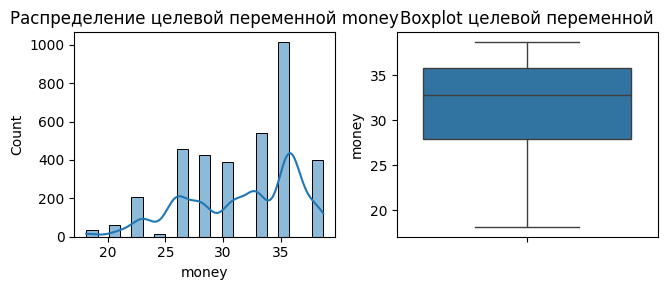

Статистики целевой переменной (money):
Среднее: 31.65
Медиана: 32.82
Стандартное отклонение: 4.88
Минимум: 18.12
Максимум: 38.70
Квартили:
count    3547.000000
mean       31.645216
std         4.877754
min        18.120000
25%        27.920000
50%        32.820000
75%        35.760000
max        38.700000
Name: money, dtype: float64


In [13]:
# Анализ распределения целевой переменной
plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
sns.histplot(df['money'], kde=True)
plt.title('Распределение целевой переменной money')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['money'])
plt.title('Boxplot целевой переменной')

plt.tight_layout()
plt.show()

# Статистики целевой переменной
print("Статистики целевой переменной (money):")
print(f"Среднее: {df['money'].mean():.2f}")
print(f"Медиана: {df['money'].median():.2f}")
print(f"Стандартное отклонение: {df['money'].std():.2f}")
print(f"Минимум: {df['money'].min():.2f}")
print(f"Максимум: {df['money'].max():.2f}")
print(f"Квартили:\n{df['money'].describe()}")

Левосторонняя асимметрия (среднее < медиана)

Асимметрия указывает на то, что нижние значения набора данных более разбросаны, чем более высокие.

Четкие ценовые сегменты: бюджетные (до 28), основные (29-36), премиум (выше 36)


## Y и числовые

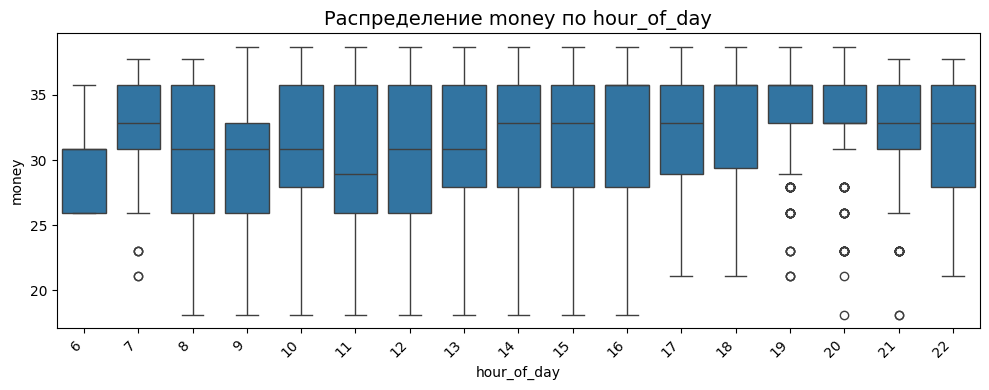

In [14]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x="hour_of_day", y="money")
plt.title("Распределение money по hour_of_day", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

На графике видно зависимость продаж от времени суток.

В ранние часы наблюдается ящики короткие (малая изменчивость). В 7 часов есть выбросы.

В обеденные часы медианы высокие, ящики широкие (большой разброс), из-за того, что есть высокие и средние значения. Это пик.

В вечерние часы медианы высокие, разброс меньше. С 19 до 21 есть выбросы.

Выбросы могут быть связаны с какими-нибудь акциями.

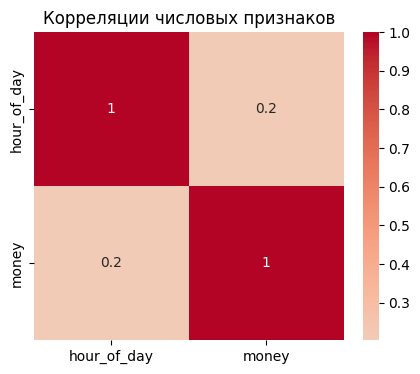

In [15]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Корреляции числовых признаков")
plt.show()

По корреляции видно, что у hour_of_day и money слабая положительная корреляция, что говорит о том, что время дня практически не влияет на покупку кофе.

In [16]:
categorial_features = ['coffee_name']
numeric_features = []
best_features = categorial_features + numeric_features

X = df[best_features]
y = df.money
#categorial_features = [] # перечислить названия колонок с категориальными фичами
#numeric_features = [] # перечислить названия колонок с категориальными фичами
#best_features = categorial_features + numeric_features

In [17]:
X.head(n=5)

,coffee_name
0,Latte
1,Hot Chocolate
2,Hot Chocolate
3,Americano
4,Latte


In [18]:
y.head()

,money
0,38.7
1,38.7
2,38.7
3,28.9
4,38.7


## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [19]:
# Преобразуем названия кофе из текста в числовой формат
encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["coffee_name"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [20]:
encoder.categories_

[array(['Americano', 'Americano with Milk', 'Cappuccino', 'Cocoa',
        'Cortado', 'Espresso', 'Hot Chocolate', 'Latte'], dtype=object)]

In [21]:
encoder.get_feature_names_out()

array(['coffee_name_Americano', 'coffee_name_Americano with Milk',
       'coffee_name_Cappuccino', 'coffee_name_Cocoa',
       'coffee_name_Cortado', 'coffee_name_Espresso',
       'coffee_name_Hot Chocolate', 'coffee_name_Latte'], dtype=object)

In [22]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3543,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X = X.drop('coffee_name', axis=1) if 'coffee_name' in X.columns else X
X = pd.concat([X, X_encoded], axis=1) if 'coffee_name_Americano' not in X.columns else X

In [24]:
X

,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3543,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
model = LinearRegression(
    fit_intercept=True, # считать свобоный коэфициент B
    copy_X=True, # Глубокое коирование матрицы X, чтробы не модифицировать
    n_jobs=None, # None - 1 ядро используем
    positive=False, # все weight могут быть как положительными, так и отрицательными
)

In [35]:
#преобразование категориальных переменных в числовые
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first'), X.select_dtypes(include=['object', 'category']).columns),
    remainder='passthrough'
)

# Применяем преобразование
X_processed = preprocessor.fit_transform(X)

# Создаем DataFrame с правильными названиями колонок
X_processed_df = pd.DataFrame(X_processed,
                             columns=preprocessor.get_feature_names_out(),
                             index=X.index)

model = make_pipeline(preprocessor, LinearRegression())

model = make_pipeline(preprocessor, LinearRegression())
model.fit(X, y)
print("Модель обучена!")

Модель обучена!


In [36]:
y_pred = model.predict(X) # предсказываем результат
y_pred

array([35.50237781, 35.9907971 , 35.9907971 , ..., 35.65338912,
       25.9756383 , 35.50237781])

### Преобразование числовых

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed_df)

# Создаем DataFrame
X_scaled_df = pd.DataFrame(X_scaled,
                          columns=X_processed_df.columns,
                          index=X.index)

print(f"После scaling: {X_scaled_df.shape}")

После scaling: (3547, 8)


### Модель


МОДЕЛЬ 1: Все признаки, обучение на всей выборке

--- Вся выборка ---
MAE = 1.283
MAPE = 0.042 (4.2%)
R² = 0.867
MSE = 3.171
RMSE = 1.781


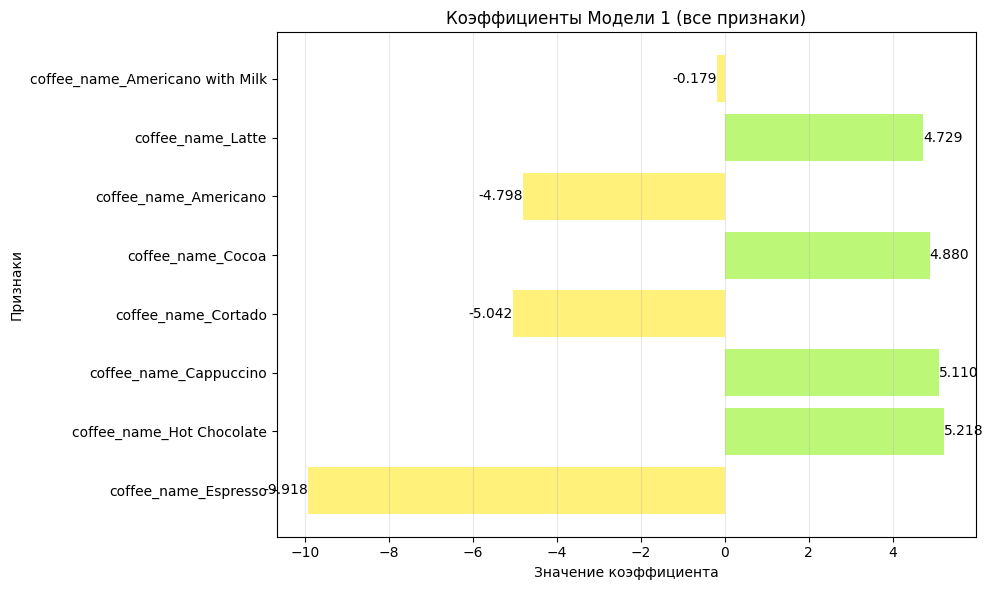


Отобранные топ-признаки: ['coffee_name_Espresso', 'coffee_name_Hot Chocolate', 'coffee_name_Cappuccino']

МОДЕЛЬ 2: Все признаки, train/test 

--- Обучающая выборка ---
MAE = 1.275
MAPE = 0.042 (4.2%)
R² = 0.870
MSE = 3.121
RMSE = 1.767

--- Тестовая выборка ---
MAE = 1.355
MAPE = 0.045 (4.5%)
R² = 0.852
MSE = 3.375
RMSE = 1.837


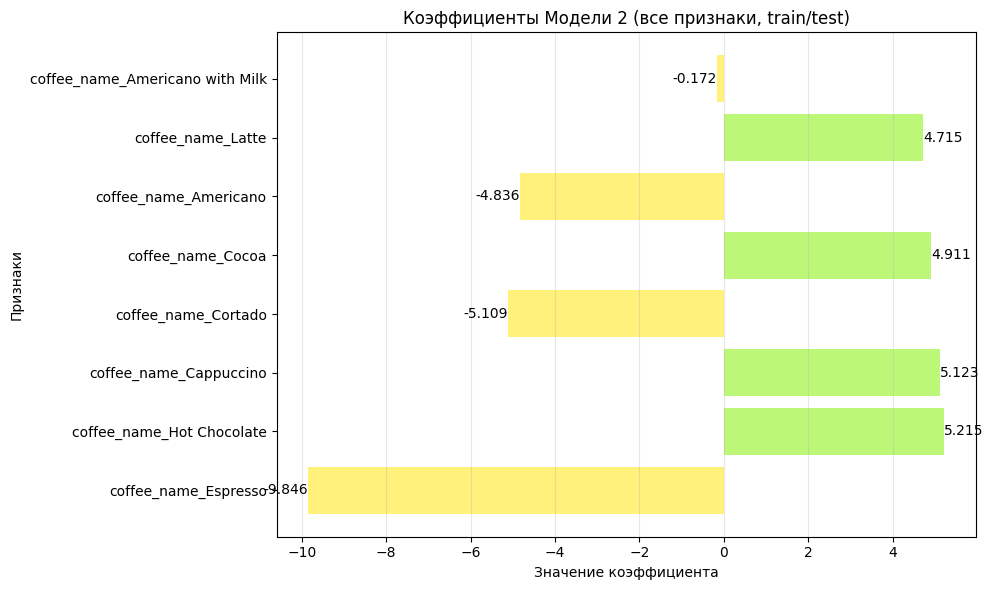


Анализ переобучения Модели 2:
R²: train=0.870, test=0.852, разница=0.018
RMSE: train=1.767, test=1.837, разница=0.070
Переобучения нет

МОДЕЛЬ 3: Отобранные признаки, обучение на всей выборке

--- Вся выборка (отобранные признаки) ---
MAE = 3.128
MAPE = 0.105 (10.5%)
R² = 0.359
MSE = 15.251
RMSE = 3.905


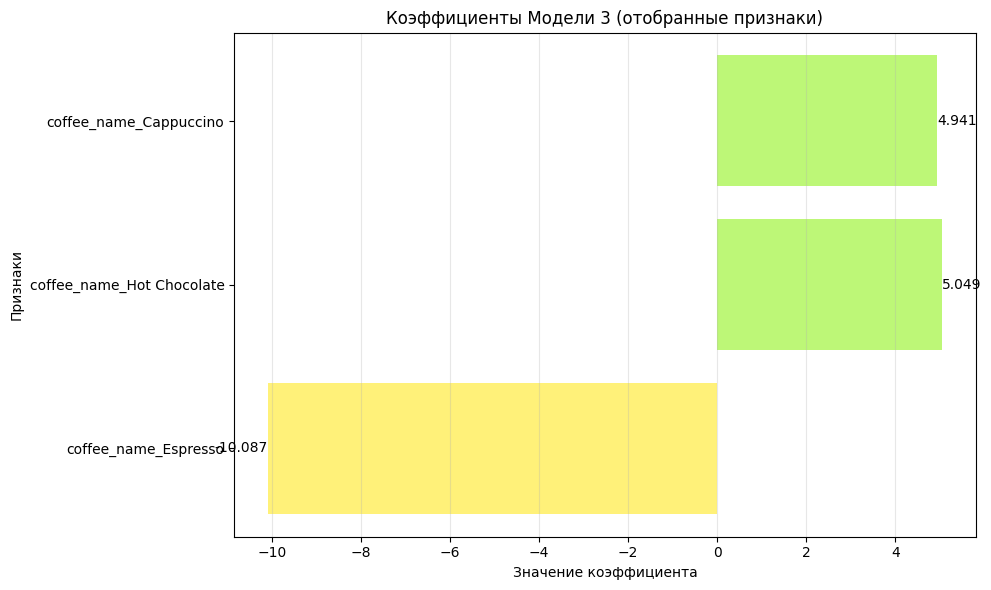


МОДЕЛЬ 4: Отобранные признаки, train/test split

--- Обучающая выборка (отобранные признаки) ---
MAE = 3.107
MAPE = 0.104 (10.4%)
R² = 0.364
MSE = 15.260
RMSE = 3.906

--- Тестовая выборка (отобранные признаки) ---
MAE = 3.192
MAPE = 0.106 (10.6%)
R² = 0.335
MSE = 15.220
RMSE = 3.901


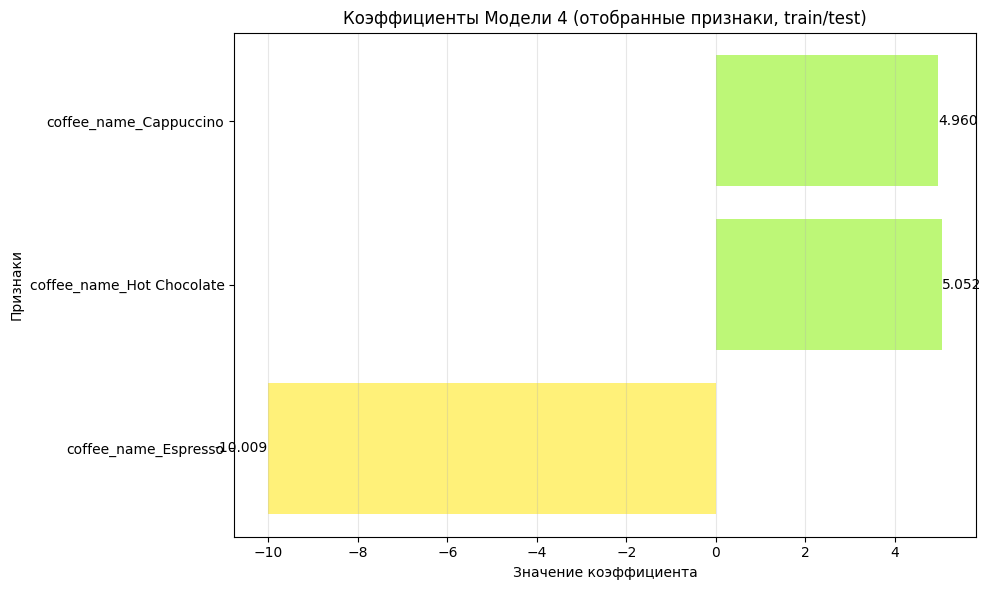


Анализ переобучения Модели 4:
R²: train=0.364, test=0.335, разница=0.030
RMSE: train=3.906, test=3.901, разница=-0.005
Переобучения нет

СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК
                           Модель     MAE    MAPE      R²    RMSE
0  М1: Все признаки (вся выборка)  1.2830  0.0425  0.8667  1.7806
1        М2: Все признаки (train)  1.2749  0.0423  0.8700  1.7668
2         М2: Все признаки (test)  1.3551  0.0445  0.8525  1.8372
3    М3: Отобранные (вся выборка)  3.1283  0.1045  0.3588  3.9053
4          М4: Отобранные (train)  3.1073  0.1040  0.3644  3.9064
5           М4: Отобранные (test)  3.1919  0.1055  0.3347  3.9013
Лучшая модель на тестовой выборке: Модель 2 (все признаки) (R² = 0.852)


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

def calculate_metrics(y_true, y_pred, dataset_name=""):
    """
    Вычисляет метрики регрессии и возвращает в виде словаря
    """
    MAE = mean_absolute_error(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)

    # Вывод метрик с названием датасета
    if dataset_name:
        print(f'\n--- {dataset_name} ---')

    print(f'MAE = {MAE:.3f}')
    print(f'MAPE = {MAPE:.3f} ({MAPE*100:.1f}%)')
    print(f'R² = {R2:.3f}')
    print(f'MSE = {MSE:.3f}')
    print(f'RMSE = {RMSE:.3f}')

    return {
        'MAE': MAE,
        'MAPE': MAPE,
        'R2': R2,
        'MSE': MSE,
        'RMSE': RMSE
    }

def plot_coefficients(model, features, title, figsize=(10, 6)):
    """
    Визуализация коэффициентов модели
    """
    plt.figure(figsize=figsize)

    # Создаем DataFrame с коэффициентами
    coefficients_df = pd.DataFrame({
        'feature': features,
        'coefficient': model.coef_
    }).sort_values('coefficient', key=abs, ascending=False)

    # Используем разные цвета для положительных и отрицательных коэффициентов
    colors = ['#FFEC40' if x < 0 else '#A1F43D' for x in coefficients_df['coefficient']]

    # Создаем barplot
    bars = plt.barh(coefficients_df['feature'], coefficients_df['coefficient'], color=colors, alpha=0.7)

    # Добавляем значения на график
    for bar in bars:
        width = bar.get_width()
        plt.text(width if width >= 0 else width,
                bar.get_y() + bar.get_height()/2,
                f'{width:.3f}',
                ha='left' if width >= 0 else 'right',
                va='center', fontsize=10)

    plt.xlabel("Значение коэффициента")
    plt.ylabel("Признаки")
    plt.title(title)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return coefficients_df

def analyze_overfitting(train_metrics, test_metrics, model_name):
    """
    Анализ переобучения модели
    """
    diff_r2 = train_metrics['R2'] - test_metrics['R2']
    diff_rmse = test_metrics['RMSE'] - train_metrics['RMSE']

    print(f"\nАнализ переобучения {model_name}:")
    print(f"R²: train={train_metrics['R2']:.3f}, test={test_metrics['R2']:.3f}, разница={diff_r2:.3f}")
    print(f"RMSE: train={train_metrics['RMSE']:.3f}, test={test_metrics['RMSE']:.3f}, разница={diff_rmse:.3f}")

    if diff_r2 > 0.1:
        print("Возможно переобучение (разница R² > 0.1)")
    elif diff_r2 > 0.05:
        print("Небольшое переобучение (разница R² > 0.05)")
    else:
        print("Переобучения нет")

    return diff_r2


# Словарь для хранения всех метрик
all_metrics = {}

# МОДЕЛЬ 1: Все признаки, обучение на всей выборке
print("\n" + "="*50)
print("МОДЕЛЬ 1: Все признаки, обучение на всей выборке")
print("="*50)

model1 = LinearRegression()
model1.fit(X, y)
y_pred1 = model1.predict(X)

metrics1 = calculate_metrics(y, y_pred1, "Вся выборка")
all_metrics['model1'] = metrics1

coefficients1 = plot_coefficients(model1, X.columns, "Коэффициенты Модели 1 (все признаки)")

# Выбираем лучшие признаки для последующих моделей
top_features = coefficients1.head(3)['feature'].tolist()
print(f"\nОтобранные топ-признаки: {top_features}")

# Разделение данных для моделей с разделением
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# МОДЕЛЬ 2: Все признаки, train/test split
print("\n" + "="*50)
print("МОДЕЛЬ 2: Все признаки, train/test ")
print("="*50)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

metrics2_train = calculate_metrics(y_train, y_train_pred2, "Обучающая выборка")
metrics2_test = calculate_metrics(y_test, y_test_pred2, "Тестовая выборка")
all_metrics['model2_train'] = metrics2_train
all_metrics['model2_test'] = metrics2_test

coefficients2 = plot_coefficients(model2, X.columns, "Коэффициенты Модели 2 (все признаки, train/test)")

# Анализ переобучения для модели 2
overfitting_2 = analyze_overfitting(metrics2_train, metrics2_test, "Модели 2")

# МОДЕЛЬ 3: Отобранные признаки, обучение на всей выборке
print("\n" + "="*50)
print("МОДЕЛЬ 3: Отобранные признаки, обучение на всей выборке")
print("="*50)

X_top = X[top_features]

model3 = LinearRegression()
model3.fit(X_top, y)
y_pred3 = model3.predict(X_top)

metrics3 = calculate_metrics(y, y_pred3, "Вся выборка (отобранные признаки)")
all_metrics['model3'] = metrics3

coefficients3 = plot_coefficients(model3, top_features, "Коэффициенты Модели 3 (отобранные признаки)")

# МОДЕЛЬ 4: Отобранные признаки, train/test split
print("\n" + "="*50)
print("МОДЕЛЬ 4: Отобранные признаки, train/test split")
print("="*50)

X_top_train = X_train[top_features]
X_top_test = X_test[top_features]

model4 = LinearRegression()
model4.fit(X_top_train, y_train)

y_train_pred4 = model4.predict(X_top_train)
y_test_pred4 = model4.predict(X_top_test)

metrics4_train = calculate_metrics(y_train, y_train_pred4, "Обучающая выборка (отобранные признаки)")
metrics4_test = calculate_metrics(y_test, y_test_pred4, "Тестовая выборка (отобранные признаки)")
all_metrics['model4_train'] = metrics4_train
all_metrics['model4_test'] = metrics4_test

coefficients4 = plot_coefficients(model4, top_features, "Коэффициенты Модели 4 (отобранные признаки, train/test)")

# Анализ переобучения для модели 4
overfitting_4 = analyze_overfitting(metrics4_train, metrics4_test, "Модели 4")

# Сравнительная таблица метрик
print("\n" + "="*50)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК")
print("="*50)

comparison = pd.DataFrame({
    'Модель': [
        'М1: Все признаки (вся выборка)',
        'М2: Все признаки (train)',
        'М2: Все признаки (test)',
        'М3: Отобранные (вся выборка)',
        'М4: Отобранные (train)',
        'М4: Отобранные (test)'
    ],
    'MAE': [all_metrics['model1']['MAE'],
            all_metrics['model2_train']['MAE'],
            all_metrics['model2_test']['MAE'],
            all_metrics['model3']['MAE'],
            all_metrics['model4_train']['MAE'],
            all_metrics['model4_test']['MAE']],
    'MAPE': [all_metrics['model1']['MAPE'],
             all_metrics['model2_train']['MAPE'],
             all_metrics['model2_test']['MAPE'],
             all_metrics['model3']['MAPE'],
             all_metrics['model4_train']['MAPE'],
             all_metrics['model4_test']['MAPE']],
    'R²': [all_metrics['model1']['R2'],
           all_metrics['model2_train']['R2'],
           all_metrics['model2_test']['R2'],
           all_metrics['model3']['R2'],
           all_metrics['model4_train']['R2'],
           all_metrics['model4_test']['R2']],
    'RMSE': [all_metrics['model1']['RMSE'],
             all_metrics['model2_train']['RMSE'],
             all_metrics['model2_test']['RMSE'],
             all_metrics['model3']['RMSE'],
             all_metrics['model4_train']['RMSE'],
             all_metrics['model4_test']['RMSE']]
})

print(comparison.round(4))

# Находим лучшую модель по R² на тестовой выборке
test_models = {
    'Модель 2 (все признаки)': all_metrics['model2_test']['R2'],
    'Модель 4 (отобранные признаки)': all_metrics['model4_test']['R2']
}

best_model = max(test_models, key=test_models.get)
best_score = test_models[best_model]

print(f"Лучшая модель на тестовой выборке: {best_model} (R² = {best_score:.3f})")



Модель 2

Высокая точность (R² = 0.85)

Малая разница train/test